In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

In [2]:
now = datetime.now()

now

datetime.datetime(2025, 9, 1, 8, 43, 18, 245805)

In [3]:
now.year, now.month, now.day

(2025, 9, 1)

In [4]:
delta = datetime(2025, 8, 11) - datetime(2021, 4, 10, 8, 15)

delta

datetime.timedelta(days=1583, seconds=56700)

In [5]:
delta.days

1583

In [6]:
delta.seconds

56700

In [7]:
from datetime import timedelta

start = datetime(2021, 8 , 26)

start + timedelta(12)


datetime.datetime(2021, 9, 7, 0, 0)

In [8]:
start - 2 * timedelta(12)


datetime.datetime(2021, 8, 2, 0, 0)

In [9]:
stamp = datetime(2011, 8, 26)

str(stamp)

'2011-08-26 00:00:00'

In [10]:
stamp.strftime("%Y-%m-%d")

'2011-08-26'

In [11]:
# %d - 2 digit day [01, 31]
# %H - Hour(24-hours clock) [00, 23]
# %I - Hour(12-hours clock) [01, 12]
# %M - 2 digit minutes [00, 59]
# %S - Second [00, 61] (second 60, 61 account for leap seconds)
# %f - Microsecond as an integer, zero-padded (from 000000 to 999999)
# %j - Day of the year as a zero-padded integer (from 001 to 336)
# %w - Weekday as an integer [0 (Sunday), 6]
# %u - Weekday as integer starting from 1, and 1 is Monday
# %U - Week number of the year [00, 53]; Sunday is the first day of the week 
# and days before the first Sunday of the year are "week 0"

# %W - Week number of the year [00, 53]; Monday is the first day of the week 
# and days before the first Monday of the year are "week 0"

# %z - UTC time zone offset as +HHMM or -HHMM; empty if time zone naive
# %Z - Time zone name as a string, or empty string if no time zone
# %F - Shortcut for %Y-%m-%d (e.g 1982-8-31)
# %D - Shortcut for %m/%d/%y (e.g 8/31/82)


In [12]:
value = "1999-04-10"

datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(1999, 4, 10, 0, 0)

In [13]:
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [14]:
datestrs = ['2023-08-10 12:00:00', '2025-08-10 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2023-08-10 12:00:00', '2025-08-10 00:00:00'], dtype='datetime64[ns]', freq=None)

In [15]:
idx = pd.to_datetime(datestrs + [None])

idx

DatetimeIndex(['2023-08-10 12:00:00', '2025-08-10 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [16]:
idx[2]

NaT

In [17]:
pd.isna(idx)

array([False, False,  True])

In [18]:
# %a - Abbreviated weekday name
# %A - Full weekday name
# %b - Abbreviated month name
# %B - Full month name
# %c - Full date & time  
# %p - Locale equivalent of AM or PM
# %x - Locale-appropriate formatted date (e.g US -> June 26, 2022 yields '06/26/2022')
# %X - Locale-approriate time (e.g: '04:24:12 PM')


In [19]:
# 11.2 Time Series Basics

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011,1,12)]

ts = pd.Series(np.random.standard_normal(6), index=dates)

ts

2011-01-02   -0.415246
2011-01-05    0.769713
2011-01-07   -1.479425
2011-01-08    0.155847
2011-01-10   -0.116247
2011-01-12   -0.663480
dtype: float64

In [20]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [21]:
ts + ts[::2]

# Recall ts[::2] selects every second element in ts

2011-01-02   -0.830491
2011-01-05         NaN
2011-01-07   -2.958851
2011-01-08         NaN
2011-01-10   -0.232495
2011-01-12         NaN
dtype: float64

In [22]:
ts.index.dtype

# Pandas store timestamps sing NumPy's datetime64 data type at the nanosecond

dtype('<M8[ns]')

In [23]:
stamp = ts.index[0]

stamp

Timestamp('2011-01-02 00:00:00')

In [24]:
# Indexing, Selection, Subsetting

stamp = ts.index[2]

ts[stamp]

np.float64(-1.4794254134567897)

In [25]:
ts['2011-01-10']

np.float64(-0.11624740262794618)

In [26]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range('2022-08-10', periods=1000))

longer_ts

2022-08-10    0.712041
2022-08-11   -0.156867
2022-08-12   -0.186183
2022-08-13   -0.548291
2022-08-14   -1.313236
                ...   
2025-05-01    0.352401
2025-05-02    0.291106
2025-05-03   -0.122679
2025-05-04   -1.640561
2025-05-05   -1.347358
Freq: D, Length: 1000, dtype: float64

In [27]:
longer_ts['2022']

2022-08-10    0.712041
2022-08-11   -0.156867
2022-08-12   -0.186183
2022-08-13   -0.548291
2022-08-14   -1.313236
                ...   
2022-12-27    1.053668
2022-12-28   -0.442076
2022-12-29    0.322976
2022-12-30   -2.832541
2022-12-31    2.134528
Freq: D, Length: 144, dtype: float64

In [28]:
ts[datetime(2011, 1, 7):]

# Slicing with datetime objects works as well

2011-01-07   -1.479425
2011-01-08    0.155847
2011-01-10   -0.116247
2011-01-12   -0.663480
dtype: float64

In [29]:
ts[datetime(2011, 1, 7):datetime(2001, 1, 10)]

Series([], dtype: float64)

In [30]:
ts

# Because most time series datas is ordered chronologically, you can slice with 
# time-stamps not contained in a time series to perform a range query

2011-01-02   -0.415246
2011-01-05    0.769713
2011-01-07   -1.479425
2011-01-08    0.155847
2011-01-10   -0.116247
2011-01-12   -0.663480
dtype: float64

In [31]:
ts['2011-01-06':'2011-01-11']

2011-01-07   -1.479425
2011-01-08    0.155847
2011-01-10   -0.116247
dtype: float64

In [32]:
ts.truncate(after='2011-01-09')

2011-01-02   -0.415246
2011-01-05    0.769713
2011-01-07   -1.479425
2011-01-08    0.155847
dtype: float64

In [33]:
dates = pd.date_range("2000-01-01", periods=100, 
freq="W-WED")

long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=['Mondstadt', 'Liyue',
                                'Inazuma', 'Sumeru'])

long_df.loc['2001-05']

,Mondstadt,Liyue,Inazuma,Sumeru
2001-05-02,0.764678,0.188880,1.724890,-0.524180
2001-05-09,-1.262415,-0.463127,1.730778,0.324467
2001-05-16,-0.537797,2.301252,1.321939,0.116451
2001-05-23,0.427118,-1.349818,0.350756,-1.773713
2001-05-30,-0.495889,0.037782,1.297295,1.519513


In [34]:
# Time Series with Duplicate

# Multiple data observations falling on 
# a particular timestamp

dates = pd.DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', 
                         '2000-01-02', '2000-01-03'])

dup_ts = pd.Series(np.arange(5), index=dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [35]:
grouped = dup_ts.groupby(level=0)

grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [36]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [37]:
# 11.3 Date Ranges, Frequencies, and Shifting

# Generating Date Ranges

indeks = pd.date_range("2012-04-01", "2012-06-01")

indeks



DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [38]:
pd.date_range("2000-01-01","2000-12-01", freq="BM")

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\2886312902.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2000-01-01","2000-12-01", freq="BM")


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [39]:
#    Alias              | Offset Type           |  Description

# W-MON, W-TUE,....     - Week                  -  Weekly on given day of week 
                                                #  (senin hingga Minggu)

# WOM-1MON, WOM-2MON    - WeekOfMonth           -  Generate weekly dates in the first,
                                                #  second, 
                                                #  3rd or 4th week of the month 
                                                #  (e.g WOM-3FRI for third (3rd) 
                                                #  Friday of each month)

# Q-JAN, Q-FEB,...      - QuarterEnd            #  Quarterly dates anchored on last calendar day
                                                #  of each month, for year ending in indicated month 
                                                #  (Januari -> Desember)  

# BQ-JAN, BQ-FEB,...    - BusinessQuarrerEnd    #  Quarterly dates anchored on last 
                                                #  weekday day of each month, 
                                                #  for year ending in indicated month

# QS-JAN, QS-FEB,...    - QuarterBegin          #  Quarterly dates anchored on first 
                                                #  calendar day of each month, 
                                                #  for year ending in indicated month

# BQS-JAN, BQS-FEB,...  - Busin.sQuartrBegin    #  Quarterly dates anchored on first 
                                                #  weekday day of each month, 
                                                #  for year ending in indicated month

# A-JAN, A-FEB,...      - YearEnd               #  Annual dates anchored on last 
                                                #  calendar of given month
                                                #  (Januari -> Desember) 

# BA-JAN, BA-FEB,...    - BusinessYearEnd       #  Annual dates anchored on last 
                                                #  weekday of given month  

# AS-JAN. AS-FEB,...    - YearBegin             #  Annual dates anchored on first 
                                                #  day of given month  

# BAS-JAN, BAS-FEB,...  - Business.Y.Begin      #  Annual dates anchored on first 
                                                #  weekday of given month  



In [40]:
pd.date_range("2012-05-02 12:56:31", periods=5)

# Preserve the time (if any) of the start or end time-stamp

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

# Sometimes have to start or end dates with time information  
# but generating a set of timestamps normalized 
# to midnight as a convention

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [42]:
# Frequencies and Date Offsets

from pandas.tseries.offsets import Hour, Minute

hour = Hour()

hour

# hourly freqency can be represented with the Hour class  
# frequencies are typically referred to by a string alias, like "M"(monthly) or "H"(hourly)

<Hour>

In [43]:
four_hours = Hour(4)

four_hours

# Defining multiple of an offset by passing integer

<4 * Hours>

In [44]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

# using a string alias like "H" or "4H". 
# Putting a integer before the base frequency creates a multiple

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\3644948081.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [45]:
Hour(2) + Minute(30)

# Offset can be combined by addition

<150 * Minutes>

In [46]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

In [47]:
monthly_dates = pd.date_range('2025-01-01', '2025-07-30', freq="WOM-3FRI")

list(monthly_dates)

# The third (3rd) week of Friday - Daftar Kalender Hari Jumat Minggu ke 3

[Timestamp('2025-01-17 00:00:00'),
 Timestamp('2025-02-21 00:00:00'),
 Timestamp('2025-03-21 00:00:00'),
 Timestamp('2025-04-18 00:00:00'),
 Timestamp('2025-05-16 00:00:00'),
 Timestamp('2025-06-20 00:00:00'),
 Timestamp('2025-07-18 00:00:00')]

In [48]:
# Shifting (Leading and Lagging) Data

ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2025-01-01", periods=4,
                                   freq="M"))

ts

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1782819049.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range("2025-01-01", periods=4,


2025-01-31    1.096402
2025-02-28   -2.007827
2025-03-31    1.169452
2025-04-30    2.186277
Freq: ME, dtype: float64

In [49]:
ts.shift(2)

# shifting this meaningly missing data is introduced at the start of the time series

2025-01-31         NaN
2025-02-28         NaN
2025-03-31    1.096402
2025-04-30   -2.007827
Freq: ME, dtype: float64

In [50]:
ts.shift(-2)

# shifting this meaningly missing data is introduced at the end of the time series

2025-01-31    1.169452
2025-02-28    2.186277
2025-03-31         NaN
2025-04-30         NaN
Freq: ME, dtype: float64

In [51]:
ts.shift(1)

2025-01-31         NaN
2025-02-28    1.096402
2025-03-31   -2.007827
2025-04-30    1.169452
Freq: ME, dtype: float64

In [52]:
ts/ts.shift(1) - 1


2025-01-31         NaN
2025-02-28   -2.831287
2025-03-31   -1.582447
2025-04-30    0.869488
Freq: ME, dtype: float64

In [53]:
ts.shift(2, freq='M')

# naive shifts leave the index unmodified, some data is discarded. 
# Thus if the frequency is known , it can be passed to shift to advance 
# the timestamps instead of simply the data

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\3842595926.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2, freq='M')


2025-03-31    1.096402
2025-04-30   -2.007827
2025-05-31    1.169452
2025-06-30    2.186277
Freq: ME, dtype: float64

In [54]:
ts.shift(3, freq='D')

# Other frequencies can be passed too giving some flexibility 
# in how to lead and lag the data

2025-02-03    1.096402
2025-03-03   -2.007827
2025-04-03    1.169452
2025-05-03    2.186277
dtype: float64

In [55]:
ts.shift(1, freq="90T")

# T is minutes.

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1924217989.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T")


2025-01-31 01:30:00    1.096402
2025-02-28 01:30:00   -2.007827
2025-03-31 01:30:00    1.169452
2025-04-30 01:30:00    2.186277
dtype: float64

In [56]:
from pandas.tseries.offsets import Day, MonthEnd

In [57]:
now = datetime(2011, 11, 17)

now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [58]:
now + MonthEnd()


Timestamp('2011-11-30 00:00:00')

In [59]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [60]:
offset = MonthEnd()

offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [61]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [62]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range('2025-01-15',
               periods= 20,
               freq='4D')
)

In [63]:
ts

2025-01-15   -2.207631
2025-01-19    0.223762
2025-01-23    1.842464
2025-01-27    1.277232
2025-01-31   -1.747852
2025-02-04   -0.021965
2025-02-08    0.475360
2025-02-12    2.818954
2025-02-16   -1.317746
2025-02-20    0.338421
2025-02-24    0.507167
2025-02-28   -0.065238
2025-03-04   -0.465221
2025-03-08    0.605882
2025-03-12    0.343787
2025-03-16   -1.481336
2025-03-20    2.383267
2025-03-24   -0.025743
2025-03-28   -0.626230
2025-04-01    0.455794
Freq: 4D, dtype: float64

In [64]:
ts.groupby(MonthEnd().rollforward).mean()

2025-01-31   -0.122405
2025-02-28    0.390708
2025-03-31    0.104915
2025-04-30    0.455794
dtype: float64

In [65]:
ts.resample('M').mean()

# discuss it later

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\271265782.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M').mean()


2025-01-31   -0.122405
2025-02-28    0.390708
2025-03-31    0.104915
2025-04-30    0.455794
Freq: ME, dtype: float64

In [66]:
# 11.4 Time Zone Handling

import pytz

pytz.common_timezones[-5:]


['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [67]:
tz = pytz.timezone('Asia/Jakarta')

tz

<DstTzInfo 'Asia/Jakarta' LMT+7:07:00 STD>

In [68]:
# Time Zone Localization and Conversion

dates = pd.date_range('2023-03-05 09:30', periods=6)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

ts

2023-03-05 09:30:00    0.400769
2023-03-06 09:30:00    1.133176
2023-03-07 09:30:00   -0.714846
2023-03-08 09:30:00   -0.363880
2023-03-09 09:30:00    1.223155
2023-03-10 09:30:00    0.525003
Freq: D, dtype: float64

In [69]:

ts_utc = ts.tz_localize('UTC')

ts_utc

2023-03-05 09:30:00+00:00    0.400769
2023-03-06 09:30:00+00:00    1.133176
2023-03-07 09:30:00+00:00   -0.714846
2023-03-08 09:30:00+00:00   -0.363880
2023-03-09 09:30:00+00:00    1.223155
2023-03-10 09:30:00+00:00    0.525003
Freq: D, dtype: float64

In [70]:
ts_utc.index

DatetimeIndex(['2023-03-05 09:30:00+00:00', '2023-03-06 09:30:00+00:00',
               '2023-03-07 09:30:00+00:00', '2023-03-08 09:30:00+00:00',
               '2023-03-09 09:30:00+00:00', '2023-03-10 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [71]:
ts_utc.tz_convert('Asia/Jakarta')

2023-03-05 16:30:00+07:00    0.400769
2023-03-06 16:30:00+07:00    1.133176
2023-03-07 16:30:00+07:00   -0.714846
2023-03-08 16:30:00+07:00   -0.363880
2023-03-09 16:30:00+07:00    1.223155
2023-03-10 16:30:00+07:00    0.525003
Freq: D, dtype: float64

In [72]:
ts_eastern = ts.tz_localize('Asia/Jakarta')

In [73]:
ts_eastern.tz_convert('UTC')

2023-03-05 02:30:00+00:00    0.400769
2023-03-06 02:30:00+00:00    1.133176
2023-03-07 02:30:00+00:00   -0.714846
2023-03-08 02:30:00+00:00   -0.363880
2023-03-09 02:30:00+00:00    1.223155
2023-03-10 02:30:00+00:00    0.525003
dtype: float64

In [74]:
ts_eastern.tz_convert('Asia/Makassar')

2023-03-05 10:30:00+08:00    0.400769
2023-03-06 10:30:00+08:00    1.133176
2023-03-07 10:30:00+08:00   -0.714846
2023-03-08 10:30:00+08:00   -0.363880
2023-03-09 10:30:00+08:00    1.223155
2023-03-10 10:30:00+08:00    0.525003
dtype: float64

In [75]:
ts.index.tz_localize('Asia/Jakarta')

DatetimeIndex(['2023-03-05 09:30:00+07:00', '2023-03-06 09:30:00+07:00',
               '2023-03-07 09:30:00+07:00', '2023-03-08 09:30:00+07:00',
               '2023-03-09 09:30:00+07:00', '2023-03-10 09:30:00+07:00'],
              dtype='datetime64[ns, Asia/Jakarta]', freq=None)

In [76]:
stamp = pd.Timestamp("2025-03-12 04:00")

In [77]:
stamp_utc = stamp.tz_localize("utc")

In [78]:
stamp_utc.tz_convert('Asia/Jakarta')

Timestamp('2025-03-12 11:00:00+0700', tz='Asia/Jakarta')

In [79]:
stamp_krasnoyarsk = pd.Timestamp("2025-03-12 04:00", tz="Asia/Krasnoyarsk")

In [80]:
stamp_krasnoyarsk

Timestamp('2025-03-12 04:00:00+0700', tz='Asia/Krasnoyarsk')

In [81]:
stamp_utc.value

1741752000000000000

In [82]:
stamp_utc.tz_convert("Asia/Jakarta").value

1741752000000000000

In [83]:
stamp = pd.Timestamp("2025-03-11 01:30", tz="Asia/Jayapura")

stamp


Timestamp('2025-03-11 01:30:00+0900', tz='Asia/Jayapura')

In [84]:
stamp + Hour()

Timestamp('2025-03-11 02:30:00+0900', tz='Asia/Jayapura')

In [85]:
stamp = pd.Timestamp("2025-11-04 00:30", tz='Asia/Jayapura')

stamp

Timestamp('2025-11-04 00:30:00+0900', tz='Asia/Jayapura')

In [86]:
stamp + 2 * Hour()

Timestamp('2025-11-04 02:30:00+0900', tz='Asia/Jayapura')

In [87]:
dates = pd.date_range("2025-03-07 09:30", periods=10, freq='B')

In [88]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

ts

2025-03-07 09:30:00   -0.061909
2025-03-10 09:30:00    0.181514
2025-03-11 09:30:00   -0.066100
2025-03-12 09:30:00   -1.001200
2025-03-13 09:30:00   -0.517891
2025-03-14 09:30:00   -1.471545
2025-03-17 09:30:00   -0.355084
2025-03-18 09:30:00   -0.325449
2025-03-19 09:30:00   -0.401878
2025-03-20 09:30:00   -0.331777
Freq: B, dtype: float64

In [89]:
# 11.5 Periods and Period Arithmetic

# Periods represent time spans, like days, month, quarters, or years.

In [90]:
p = pd.Period("2024", freq="A-DEC")

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1478794786.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2024", freq="A-DEC")


In [91]:
p


Period('2024', 'Y-DEC')

In [92]:
p + 5

Period('2029', 'Y-DEC')

In [93]:
p - 2

Period('2022', 'Y-DEC')

In [94]:
pd.Period('2023', freq='A-DEC') - p

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1037055430.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period('2023', freq='A-DEC') - p


<-1 * YearEnd: month=12>

In [95]:
periods = pd.period_range('2017-01-01', '2025-06-30', freq="M")

periods

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10',
             ...
             '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02',
             '2025-03', '2025-04', '2025-05', '2025-06'],
            dtype='period[M]', length=102)

In [96]:
pd.Series(np.random.standard_normal(len(periods)), index=periods)

2017-01   -0.396175
2017-02   -1.860020
2017-03   -0.791157
2017-04   -1.532661
2017-05   -0.413405
             ...   
2025-02   -1.008058
2025-03    1.780132
2025-04    0.119403
2025-05    0.666150
2025-06    0.704618
Freq: M, Length: 102, dtype: float64

In [97]:
values = ["2001Q3", "2002Q2", "2003Q1"]

indeks = pd.PeriodIndex(values, freq="Q-DEC")

indeks

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [98]:
# Period Frequency Conversion

# Periods and PeriodIndex Objects can be 
# converted to another frequency with their asfreq method

In [99]:
p = pd.Period("2024", freq="A-DEC")

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1478794786.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2024", freq="A-DEC")


In [100]:
p

Period('2024', 'Y-DEC')

In [101]:
p.asfreq("M", how="start")

Period('2024-01', 'M')

In [102]:
p.asfreq("M", how="end")

Period('2024-12', 'M')

In [103]:
p = pd.Period("Aug-2024", "M")

p.asfreq("A-JUN")

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\43701047.py:3: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p.asfreq("A-JUN")


Period('2025', 'Y-JUN')

In [104]:
# Quarterly Period Frequencies



In [105]:
p = pd.Period('2024Q4', freq="Q-JAN")

p

Period('2024Q4', 'Q-JAN')

In [106]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\2204560885.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\2204560885.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60


In [107]:
p4pm

Period('2024-01-30 16:00', 'min')

In [108]:

p4pm.to_timestamp()

Timestamp('2024-01-30 16:00:00')

In [109]:
periods = pd.period_range('2023Q3', '2024Q4', freq="Q-JAN")

ts = pd.Series(np.arange(len(periods)), index=periods)

In [110]:
ts

2023Q3    0
2023Q4    1
2024Q1    2
2024Q2    3
2024Q3    4
2024Q4    5
Freq: Q-JAN, dtype: int64

In [111]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 1

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\36793528.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 1
C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\36793528.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 1


In [112]:
ts.index = new_periods.to_timestamp()

ts

2022-10-28 01:00:00    0
2023-01-30 01:00:00    1
2023-04-27 01:00:00    2
2023-07-28 01:00:00    3
2023-10-30 01:00:00    4
2024-01-30 01:00:00    5
dtype: int64

In [113]:
# Converting Timestamps to Periods (and back)

dates = pd.date_range("2024-01-01", periods=3, freq="M")

ts = pd.Series(np.random.standard_normal(3), index=dates)

ts

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\135993185.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2024-01-01", periods=3, freq="M")


2024-01-31    0.440525
2024-02-29   -1.544873
2024-03-31    0.728840
Freq: ME, dtype: float64

In [114]:
pts = ts.to_period()

pts

2024-01    0.440525
2024-02   -1.544873
2024-03    0.728840
Freq: M, dtype: float64

In [115]:
dates = pd.date_range("2024-01-29", periods=6)

ts2 = pd.Series(np.random.standard_normal(6), index=dates)

ts2

2024-01-29    0.319972
2024-01-30    0.033550
2024-01-31    0.249257
2024-02-01    0.892306
2024-02-02    0.167674
2024-02-03    0.437568
Freq: D, dtype: float64

In [116]:
pts = ts2.to_period()

pts

2024-01-29    0.319972
2024-01-30    0.033550
2024-01-31    0.249257
2024-02-01    0.892306
2024-02-02    0.167674
2024-02-03    0.437568
Freq: D, dtype: float64

In [117]:
pts.to_timestamp(how="end")

2024-01-29 23:59:59.999999999    0.319972
2024-01-30 23:59:59.999999999    0.033550
2024-01-31 23:59:59.999999999    0.249257
2024-02-01 23:59:59.999999999    0.892306
2024-02-02 23:59:59.999999999    0.167674
2024-02-03 23:59:59.999999999    0.437568
Freq: D, dtype: float64

In [118]:
# Creating a PeriodIndex from Arrays

data = pd.read_csv("macrodata.csv")

data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [119]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [120]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [121]:
indeks = pd.PeriodIndex(year=data['year'],
                        quarter=data['quarter'],
                        freq="Q-DEC")

indeks

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\3335696594.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  indeks = pd.PeriodIndex(year=data['year'],


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [122]:
data.index = indeks

data['infl']

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [123]:
# 11.6 Resampling and Frequency Conversion

dates = pd.date_range("2024-01-01", periods=100)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)


In [124]:
ts

2024-01-01   -0.942407
2024-01-02   -0.654277
2024-01-03    2.528663
2024-01-04    0.088865
2024-01-05   -0.957756
                ...   
2024-04-05   -0.092612
2024-04-06   -0.331086
2024-04-07    0.396289
2024-04-08    0.291837
2024-04-09    0.517200
Freq: D, Length: 100, dtype: float64

In [125]:
# Table of resample method arguments

# rule - String, DateOffset, or timedelta 
# indicating desired resample frequency

# axis          - Axis to resample on; default axis = 0

# fill_method   - How to interpolate when upsampling, 
# as in "ffill" or "bfill"; by default does no interpolation

# closed        - In downsampling which end of 
#                 each interval is closed (indusive), "right" or "left"

# label         - In downsampling how to label the aggregated result, with
#                 the "right" or "left" bin edge (e.g. the 9:30 to 9:35)

# limit         - When forward or backward filling, 
#                 the maximum number of periods to fill

# kind          - Aggregate to periods ("period") or timestamp ("timestamp");
#                 default to the type of index the time series has

# convention    - When resampling periods, the convention ("start" or "end") 
#                 for converting the low-frequency period to high frequency; 
#                 default to "start" 

# origin        - The "base" timestamp from which to determine the resampling 
#                 bin edges; can also be one of "epoch", "start", 
#                 "start_day", "end_day"; see the resample docstring 
#                 for full details

# offset        - An offset timedelta added to the origin; defaults to None

In [126]:
# Downsampling
# It is aggregating data to a regular, lower frequency. The data you are 
# aggregating doesn't need to be fixed frequently; the desired frequency 
# defines bin edges that are used to slice the time series into 
# pieces to aggregate




In [127]:
dates = pd.date_range("2023-01-01", periods=12, freq="T")

ts = pd.Series(np.arange(len(dates)), index=dates)


C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1797380148.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range("2023-01-01", periods=12, freq="T")


In [128]:
ts

2023-01-01 00:00:00     0
2023-01-01 00:01:00     1
2023-01-01 00:02:00     2
2023-01-01 00:03:00     3
2023-01-01 00:04:00     4
2023-01-01 00:05:00     5
2023-01-01 00:06:00     6
2023-01-01 00:07:00     7
2023-01-01 00:08:00     8
2023-01-01 00:09:00     9
2023-01-01 00:10:00    10
2023-01-01 00:11:00    11
Freq: min, dtype: int64

In [129]:
ts.resample("5min").sum()

2023-01-01 00:00:00    10
2023-01-01 00:05:00    35
2023-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [130]:
ts.resample("5min", closed="right").sum()

2022-12-31 23:55:00     0
2023-01-01 00:00:00    15
2023-01-01 00:05:00    40
2023-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [131]:
ts.resample("5min", closed="right", label="right").sum()

2023-01-01 00:00:00     0
2023-01-01 00:05:00    15
2023-01-01 00:10:00    40
2023-01-01 00:15:00    11
Freq: 5min, dtype: int64

In [132]:
from pandas.tseries.frequencies import to_offset

In [133]:
result = ts.resample("5min", closed="right", label="right").sum()

result.index = result.index + to_offset("-1s")

In [134]:
result

2022-12-31 23:59:59     0
2023-01-01 00:04:59    15
2023-01-01 00:09:59    40
2023-01-01 00:14:59    11
Freq: 5min, dtype: int64

In [135]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))),
               index=dates)

ts.resample("5min").ohlc()

,open,high,low,close
2023-01-01 00:00:00,8,9,3,5
2023-01-01 00:05:00,6,10,0,7
2023-01-01 00:10:00,11,11,2,2


In [136]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2023-01-01",periods=2,freq="W-WED"),
                     columns=['Navia', 'Ningguang', 'Cascha', 'Clorinde'])

frame

,Navia,Ningguang,Cascha,Clorinde
2023-01-04,1.219651,-0.450909,1.238407,1.074526
2023-01-11,0.456701,0.887775,1.752889,0.112113


In [137]:
df_daily = frame.resample("D").asfreq()

df_daily

,Navia,Ningguang,Cascha,Clorinde
2023-01-04,1.219651,-0.450909,1.238407,1.074526
2023-01-05,NaN,NaN,NaN,NaN
2023-01-06,NaN,NaN,NaN,NaN
2023-01-07,NaN,NaN,NaN,NaN
2023-01-08,NaN,NaN,NaN,NaN
2023-01-09,NaN,NaN,NaN,NaN
2023-01-10,NaN,NaN,NaN,NaN
2023-01-11,0.456701,0.887775,1.752889,0.112113


In [138]:
frame.resample("D").ffill()

# Suppose you wanted to fill forward each weekly value on 
# the non-Wednesdays. The same filling or interpolation methods 
# in the fillna and reindex methods are available for resampling

,Navia,Ningguang,Cascha,Clorinde
2023-01-04,1.219651,-0.450909,1.238407,1.074526
2023-01-05,1.219651,-0.450909,1.238407,1.074526
2023-01-06,1.219651,-0.450909,1.238407,1.074526
2023-01-07,1.219651,-0.450909,1.238407,1.074526
2023-01-08,1.219651,-0.450909,1.238407,1.074526
2023-01-09,1.219651,-0.450909,1.238407,1.074526
2023-01-10,1.219651,-0.450909,1.238407,1.074526
2023-01-11,0.456701,0.887775,1.752889,0.112113


In [139]:
frame.resample("D").ffill(limit=2)

# you can similarly choose to only fill a certain number of 
# periods forward to limit how far to continue using an observed value
# 

,Navia,Ningguang,Cascha,Clorinde
2023-01-04,1.219651,-0.450909,1.238407,1.074526
2023-01-05,1.219651,-0.450909,1.238407,1.074526
2023-01-06,1.219651,-0.450909,1.238407,1.074526
2023-01-07,NaN,NaN,NaN,NaN
2023-01-08,NaN,NaN,NaN,NaN
2023-01-09,NaN,NaN,NaN,NaN
2023-01-10,NaN,NaN,NaN,NaN
2023-01-11,0.456701,0.887775,1.752889,0.112113


In [140]:
frame.resample("W-THU").ffill()

,Navia,Ningguang,Cascha,Clorinde
2023-01-05,1.219651,-0.450909,1.238407,1.074526
2023-01-12,0.456701,0.887775,1.752889,0.112113


In [141]:
# Resampling with Periods

frame = pd.DataFrame(np.random.standard_normal((24,4)),
                     index=pd.period_range("1-2023", "12-2024", freq="M"),
                     columns=['Mona', 'Noelle', 'Citlali', 'Lanyan'])



In [142]:
frame.head()

,Mona,Noelle,Citlali,Lanyan
2023-01,-0.815974,-0.268037,0.367592,0.431618
2023-02,-0.652722,-0.552422,-1.316411,1.037136
2023-03,0.090370,1.072497,0.034706,-0.732020
2023-04,-0.405833,0.041517,0.923042,-0.789128
2023-05,-0.692302,0.495869,0.042273,0.960983


In [143]:
annual_frame = frame.resample("A-DEC").mean()

annual_frame

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1452418181.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame = frame.resample("A-DEC").mean()
C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1452418181.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("A-DEC").mean()


,Mona,Noelle,Citlali,Lanyan
2023,-0.267404,0.060149,0.459347,0.178578
2024,-0.231278,-0.011754,-0.113158,-0.092877


In [144]:
annual_frame.resample('Q-DEC').ffill()

# Unsampling is more nuanced, as before resampling you must make 
# a decision about which end of the time span in the new frequency 
# to place the value
# Q-DEC --> Quarterly, year ending in December 

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\663142359.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC').ffill()


,Mona,Noelle,Citlali,Lanyan
2023Q1,-0.267404,0.060149,0.459347,0.178578
2023Q2,-0.267404,0.060149,0.459347,0.178578
2023Q3,-0.267404,0.060149,0.459347,0.178578
2023Q4,-0.267404,0.060149,0.459347,0.178578
2024Q1,-0.231278,-0.011754,-0.113158,-0.092877
2024Q2,-0.231278,-0.011754,-0.113158,-0.092877
2024Q3,-0.231278,-0.011754,-0.113158,-0.092877
2024Q4,-0.231278,-0.011754,-0.113158,-0.092877


In [145]:
annual_frame.resample("Q-DEC", convention="end").asfreq()


C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1067917637.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()
C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1067917637.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()


,Mona,Noelle,Citlali,Lanyan
2023Q4,-0.267404,0.060149,0.459347,0.178578
2024Q1,NaN,NaN,NaN,NaN
2024Q2,NaN,NaN,NaN,NaN
2024Q3,NaN,NaN,NaN,NaN
2024Q4,-0.231278,-0.011754,-0.113158,-0.092877


In [146]:
annual_frame.resample('Q-MAR').ffill()

# if these rules are not satisfied, 
# an exception will be raised. This mainly affects 
# the quarterly, annual, and weekly frequencies

# for example --> the time spans defined by Q-MAR only line up with 
# A-MAR, A-JUN, A-SEP, and A-DEC

C:\Users\NITRO\AppData\Local\Temp\ipykernel_21608\1394285948.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-MAR').ffill()


,Mona,Noelle,Citlali,Lanyan
2023Q4,-0.267404,0.060149,0.459347,0.178578
2024Q1,-0.267404,0.060149,0.459347,0.178578
2024Q2,-0.267404,0.060149,0.459347,0.178578
2024Q3,-0.267404,0.060149,0.459347,0.178578
2024Q4,-0.231278,-0.011754,-0.113158,-0.092877
2025Q1,-0.231278,-0.011754,-0.113158,-0.092877
2025Q2,-0.231278,-0.011754,-0.113158,-0.092877
2025Q3,-0.231278,-0.011754,-0.113158,-0.092877


In [147]:
# Grouped TIme Resampling

N = 15

times = pd.date_range("2020-05-20 00:00", 
                      freq='1min',
                      periods=N)

df = pd.DataFrame({"time": times,
                   "Value": np.arange(N)})

In [148]:
df

,time,Value
0,2020-05-20 00:00:00,0
1,2020-05-20 00:01:00,1
2,2020-05-20 00:02:00,2
3,2020-05-20 00:03:00,3
4,2020-05-20 00:04:00,4
5,2020-05-20 00:05:00,5
6,2020-05-20 00:06:00,6
7,2020-05-20 00:07:00,7
8,2020-05-20 00:08:00,8
9,2020-05-20 00:09:00,9


In [149]:
df2 = pd.DataFrame({'time': times.repeat(3),
                    'key': np.tile(['a', 'b', 'c'], N),
                    'value': np.arange(N * 3)})

df2.head(8)

,time,key,value
0,2020-05-20 00:00:00,a,0
1,2020-05-20 00:00:00,b,1
2,2020-05-20 00:00:00,c,2
3,2020-05-20 00:01:00,a,3
4,2020-05-20 00:01:00,b,4
5,2020-05-20 00:01:00,c,5
6,2020-05-20 00:02:00,a,6
7,2020-05-20 00:02:00,b,7


In [150]:
time_key = pd.Grouper(freq='5min')

In [151]:
resampled = (df2.set_index('time').
             groupby(['key', time_key]).
             sum())

resampled

value
key time                      
a   2020-05-20 00:00:00     30
    2020-05-20 00:05:00    105
    2020-05-20 00:10:00    180
b   2020-05-20 00:00:00     35
    2020-05-20 00:05:00    110
    2020-05-20 00:10:00    185
c   2020-05-20 00:00:00     40
    2020-05-20 00:05:00    115
    2020-05-20 00:10:00    190

In [152]:
resampled.reset_index()

,key,time,value
0,a,2020-05-20 00:00:00,30
1,a,2020-05-20 00:05:00,105
2,a,2020-05-20 00:10:00,180
3,b,2020-05-20 00:00:00,35
4,b,2020-05-20 00:05:00,110
5,b,2020-05-20 00:10:00,185
6,c,2020-05-20 00:00:00,40
7,c,2020-05-20 00:05:00,115
8,c,2020-05-20 00:10:00,190


In [153]:
# 11.7 Moving Window Functions



In [154]:
close_px_all = pd.read_csv('stock_px.csv',
                           parse_dates=True,
                           index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px = close_px.resample('B').ffill()

<Axes: >

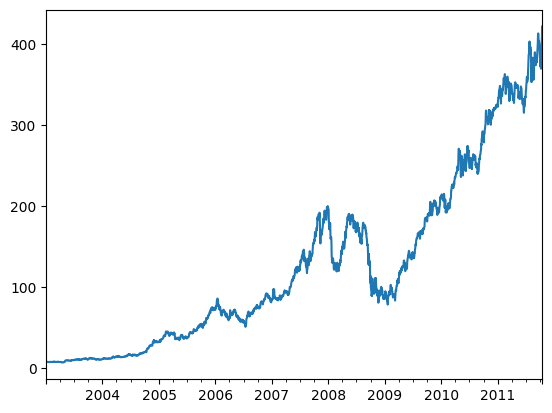

In [155]:
close_px['AAPL'].plot()

<Axes: >

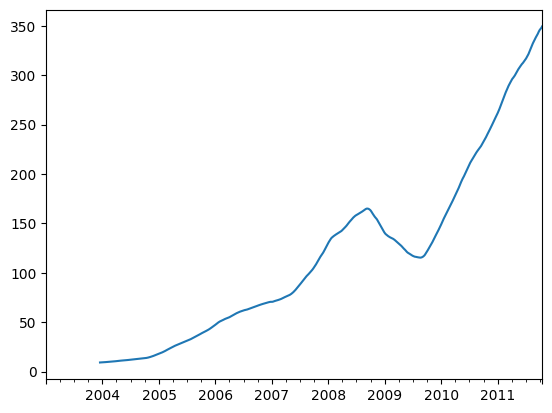

In [156]:
close_px["AAPL"].rolling(250).mean().plot()

<Axes: >

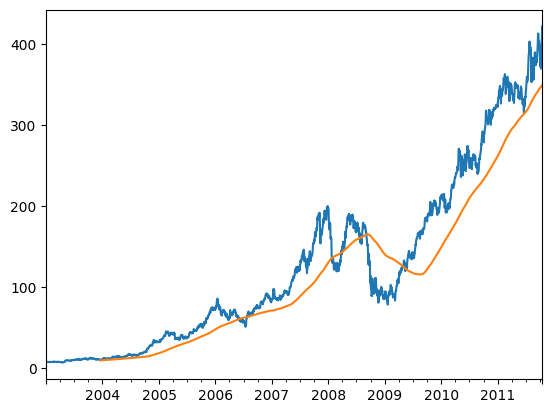

In [157]:
close_px['AAPL'].plot()
close_px["AAPL"].rolling(250).mean().plot()


In [158]:
import matplotlib.pyplot as plt


plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [159]:
std250 = close_px['AAPL'].pct_change().rolling(250, min_periods=10).std()


In [160]:
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Axes: >

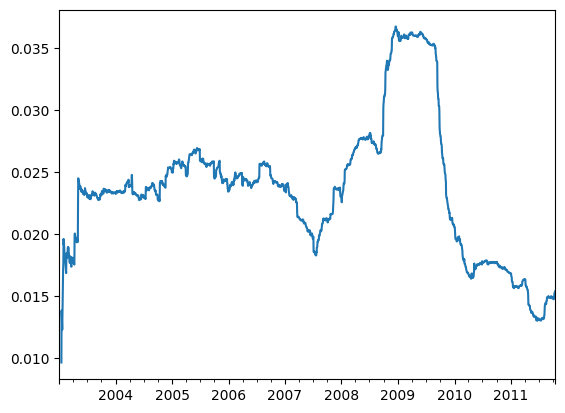

In [161]:
std250.plot()

In [162]:
expanding_mean = std250.expanding().mean()

<Axes: >

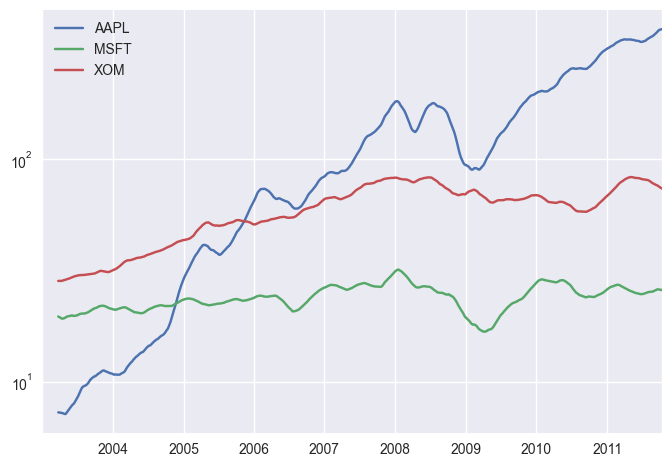

In [163]:
plt.style.use('seaborn-v0_8')

close_px.rolling(60).mean().plot(logy=True)

In [164]:
close_px.rolling('20D').mean()

# compute a 20 days rolling mean

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [165]:
# Exponentially Weighted Functions

aapl_px = close_px['AAPL']['2006':'2007']

In [166]:
ma30 = aapl_px.rolling(30, min_periods=20).mean()

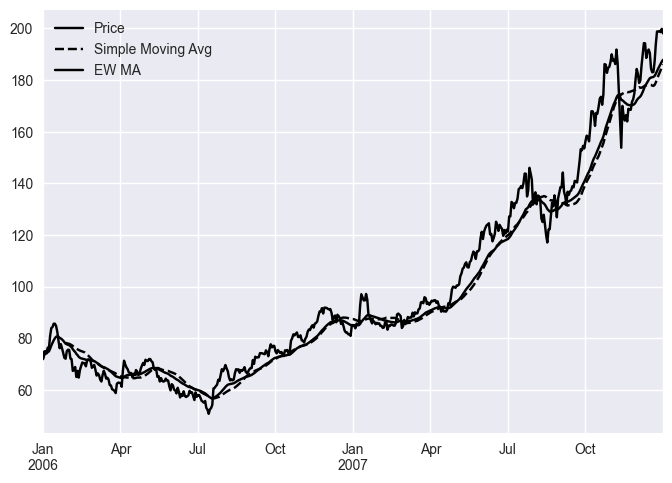

In [167]:
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style='k-', label='Price')

ma30.plot(style='k--', label='Simple Moving Avg')

ewma30.plot(style='k-', label='EW MA')

plt.legend()

In [168]:
# Binary Moving Window Functions

spx_px = close_px_all["SPX"]

spx_rets = spx_px.pct_change()

returns = close_px.pct_change() 

<Axes: >

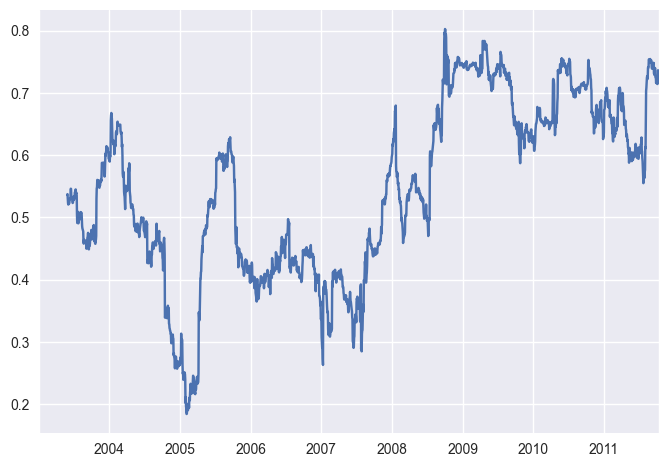

In [169]:
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

In [170]:
# Some statistical operators, like corrlaton and covariance need to 
# operate on two time series.
# As an example, financial analysts are often interested in 
# a stock correlation to a benchmark index like the S&P 500.

# Suppose you wanted to compute the rolling correlation of 
# the S&P 500 index with many stocks at once


In [171]:
# User-Defined Moving Window Functions

from scipy.stats import percentileofscore

In [172]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns['AAPL'].rolling(250).apply(score_at_2percent)

<Axes: >

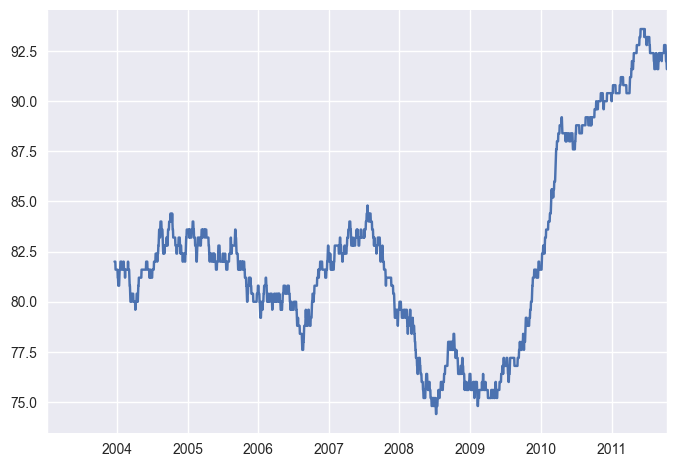

In [173]:
result.plot()

In [174]:
# 11.8 Conclusion

# Time series data calls for different types of analysis and data transformation tools 
# than the other types of data we have explored in previous chapters.

# In the following chapter, we will show how to start 
# using modeling libraries like statsmodels and scikit-learn